In [10]:
import DMeRates
import DMeRates.DMeRate as DMeRate
import numericalunits as nu
import numpy as np
import torch
import matplotlib.pyplot as plt

In [11]:
mX_array = np.concatenate((np.arange(0.2,0.8,0.025),np.array([0.9]),np.arange(1,5,0.05),np.arange(5,11,1),np.array([20,50,100,200,500,1000,10000]))) #MeV
FDMn = 2
halo_model = 'shm'
DoScreen = True
test_mX = 10 #MeV
test_mX_eV = test_mX*1e6
ne = 1
cs = 1e-36

In [14]:
from QCDark.dark_matter_rates import *

if DoScreen:
    screening = default_si
else:
    screening = default_screening
cff = read_output('QCDark/results/Si_final.hdf5')
Ee_old, dR_old= d_rate(test_mX_eV, cff, FDM_exp = FDMn, screening = screening, astro_model = default_astro)


from QEDark.QEDark2 import QEDark
qedark = QEDark()
Ee_qe = torch.arange(0,50,0.1)
drde_qedark = qedark.vectorized_dRdE('Si',test_mX_eV,Ee_qe,FDMn,'imb',DoScreen=DoScreen)


import DMeRates
import DMeRates.DMeRate
dmrates = DMeRate.DMeRate('Si',QEDark=False)
dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)


drde_qcdark_redo = dmrates.vectorized_dRdE(test_mX,FDMn,halo_model,DoScreen=DoScreen,integrate=True,unitize=True) 
drde_qedark_redo = dmrates_qedark.vectorized_dRdE(test_mX,FDMn,'imb',DoScreen=DoScreen,integrate=False,unitize=True)



Using form factor calculated from file: /Users/ansh/Local/SENSEI/DarkMatterRates/DMeRates/../QCDark/results/Si_final.hdf5


/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torchquad/integration/simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(


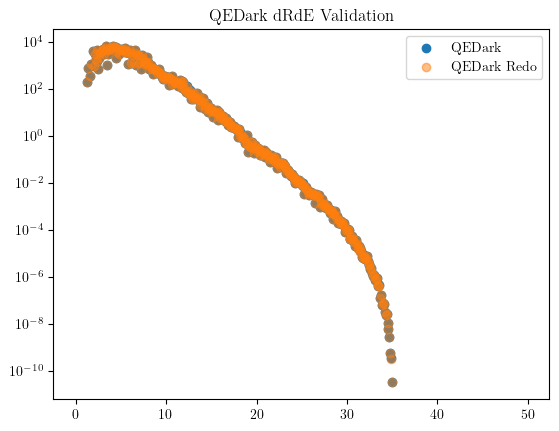

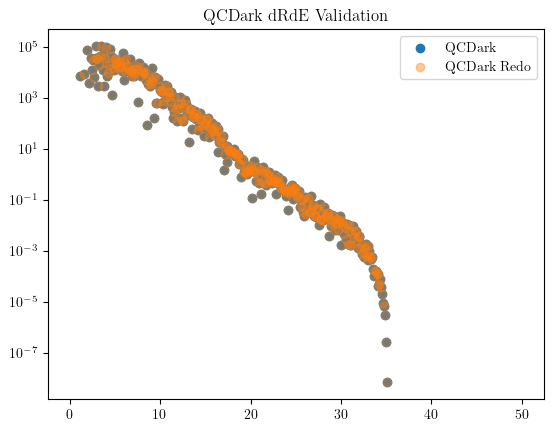

In [18]:
plt.scatter(Ee_qe,drde_qedark,label='QEDark')
plt.scatter(dmrates_qedark.Earr/nu.eV,drde_qedark_redo,label='QEDark Redo',alpha=0.5)
plt.yscale('log')
plt.legend()
plt.title('QEDark dRdE Validation')
plt.show()
plt.close()

plt.scatter(Ee_old,dR_old,label='QCDark')
plt.scatter(dmrates.Earr/nu.eV,drde_qcdark_redo,label='QCDark Redo',alpha=0.4)
plt.yscale('log')
plt.legend()
plt.title('QCDark dRdE Validation')
plt.show()
plt.close()


In [4]:
ionizationFile = 'DMeRates/p100k.dat'
ionization_model = 'R'

Si_ff = form_factor('QCDark/results/Si_final.hdf5')
from QEDark.QEDark2 import QEDark
qedark = QEDark()
qedark_step= QEDark()
qedark_step.change_to_step()

qcdark_results = []
qedark_results = []
qcdark_results_step = []
nes = [1,2,3,4,5,6,7,8,9,10]
qedark_results_step = []

for mX in mX_array: #MeV
    qcdarkeresult = d_rate_RamanathanQ(mX*1e6, Si_ff, ionizationFile, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
    qcdarkeresult = qcdarkeresult[1][ne]
    qcdark_results.append(qcdarkeresult)

    qcdarkeresultstep = d_rate_FanoQ(mX*1e6, Si_ff, 3.8, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
    qcdarkeresultstep = qcdarkeresultstep[1][ne]
    qcdark_results_step.append(qcdarkeresultstep)


    qedarkresult = qedark.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
    qedark_results.append(float(qedarkresult))
    qedarkresultstep = qedark_step.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
    qedark_results_step.append(float(qedarkresultstep))

qedark_results = np.array(qedark_results)
qcdark_results = np.array(qcdark_results)
qedark_results_step = np.array(qedark_results_step)
qcdark_results_step = np.array(qcdark_results_step)



Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be ignored.
Input file has probabilities listed for 1.10 eV <= E <= 50.00 eV.
All rates outside this range will be i

In [5]:
import DMeRates
import DMeRates.DMeRate
dmrates = DMeRate.DMeRate('Si',QEDark=False)
dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)

qcdark_redo = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
qedark_redo = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year


dmrates_qedark.change_to_step()
dmrates.change_to_step()

qcdark_redo_step = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
qedark_redo_step = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year





Using form factor calculated from file: /Users/ansh/Local/SENSEI/DarkMatterRates/DMeRates/../QCDark/results/Si_final.hdf5


/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torchquad/integration/simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(
/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


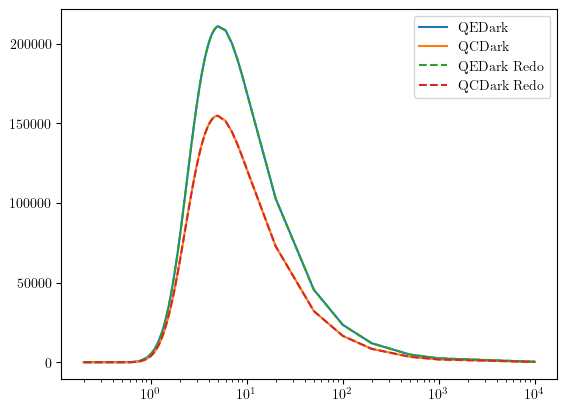

In [6]:
plt.plot(mX_array,qedark_results,label='QEDark')
plt.plot(mX_array,qcdark_results,label='QCDark')
plt.plot(mX_array,qedark_redo,label='QEDark Redo',ls='--')
plt.plot(mX_array,qcdark_redo,label='QCDark Redo',ls='--')

plt.legend()
plt.xscale('log')
# plt.yscale('log')

plt.show()
plt.close()

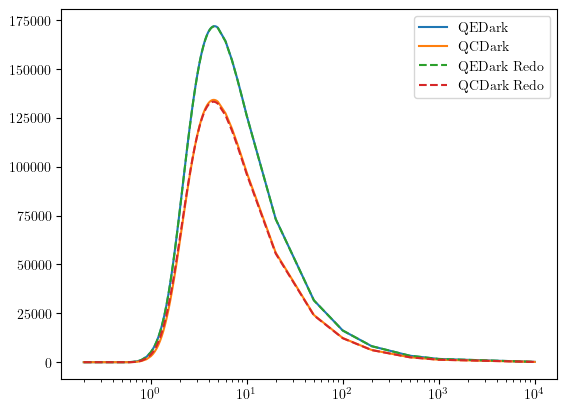

In [7]:
plt.plot(mX_array,qedark_results_step,label='QEDark')
plt.plot(mX_array,qcdark_results_step,label='QCDark')
plt.plot(mX_array,qedark_redo_step,label='QEDark Redo',ls='--')
plt.plot(mX_array,qcdark_redo_step,label='QCDark Redo',ls='--')

plt.legend()
plt.xscale('log')
# plt.yscale('log')

plt.show()
plt.close()